# Part 1: Clustering

In [165]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering, SpectralClustering, AffinityPropagation, Birch, MiniBatchKMeans
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
from kneed import KneeLocator

In [178]:
df = pd.read_csv('Country-data.csv', sep=';', index_col='ID').drop('Unnamed: 11', axis=1)

In [179]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ID,,,,,,,,,,
1,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
2,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
3,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
4,Angola,119,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
5,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


In [184]:
df.gdpp.mean()

12901.535449101795

In [181]:
df.groupby('exports').count()

,country,child_mort,health,imports,income,inflation,life_expec,total_fer,gdpp
exports,,,,,,,,,
0.109,1,1,1,1,1,1,1,1,1
2.200,1,1,1,1,1,1,1,1,1
4.790,1,1,1,1,1,1,1,1,1
8.920,1,1,1,1,1,1,1,1,1
9.580,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
103.000,1,1,1,1,1,1,1,1,1
116.000,1,1,1,1,1,1,1,1,1
153.000,1,1,1,1,1,1,1,1,1


The values for all features must be transformed to the same scale.

In [169]:
df.dtypes

country        object
child_mort     object
exports       float64
health        float64
imports       float64
income        float64
inflation     float64
life_expec    float64
total_fer     float64
gdpp          float64
dtype: object

In [170]:
df_enc = df[['exports','health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

In [171]:
le = LabelEncoder()

le.fit(df['country'].astype(str))
df_enc['country'] = le.transform(df['country'].astype(str))

le.fit(df['child_mort'].astype(str))
df_enc['child_mort'] = le.transform(df['child_mort'].astype(str))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [172]:
scaler = StandardScaler()
scaler.fit(df_enc)
scaled_features = scaler.transform(df_enc)

In [173]:
scaled_features

array([[-1.12569622, -0.02372967, -0.02925361, ..., -0.67433901,
        -1.71649592,  1.64226384],
       [-0.47943123, -0.15888663,  0.12059652, ..., -0.4811876 ,
        -1.69562097, -0.84683507],
       [-0.10603368, -0.47119106, -0.5760041 , ..., -0.46098233,
        -1.67474602, -0.18646189],
       ...,
       [ 1.10032763, -0.12083273,  1.40039766, ..., -0.63300013,
         1.686121  , -0.31345673],
       [-0.40762401, -0.33865851, -0.45450399, ..., -0.63300013,
         1.70699595,  0.82949685],
       [-0.15629874, -0.24549206, -0.59625412, ..., -0.62480881,
         1.7278709 ,  1.54066796]])

#### I used PCA to reduce the number of dimensions so that we can visualize the results using a 2D Scatter plot.

In [185]:
pca = PCA(2) 
df = pca.fit_transform(scaled_features)
 
df.shape

(167, 2)

### 1. KMEANS

In [208]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
kmeans.fit(df)

KMeans(init='random', n_clusters=3, random_state=42)

In [209]:
# The lowest SSE value
kmeans.inertia_

216.0589299790646

In [210]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-1.5301806 ,  1.48123772],
       [ 0.25062655, -0.72503501],
       [ 9.82104846,  4.72460845]])

In [211]:
# The number of iterations required to converge
kmeans.n_iter_

4

In [212]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [194]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="random", n_init=10,max_iter=300,random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

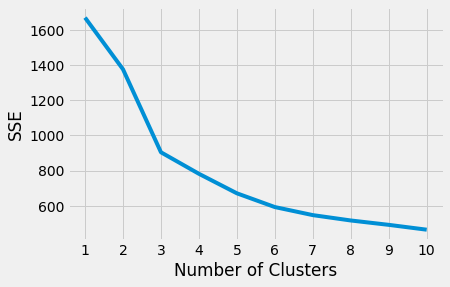

In [195]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [196]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [201]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="random", n_init=10,max_iter=300,random_state=42)
    kmeans.fit(df)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

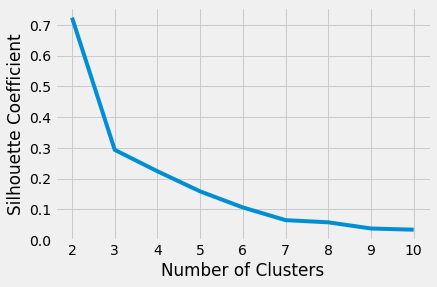

In [202]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [206]:
kmeans.labels_

array([3, 8, 8, 9, 1, 8, 8, 6, 5, 9, 1, 6, 0, 1, 1, 7, 9, 3, 8, 8, 8, 9,
       8, 7, 1, 3, 3, 9, 3, 5, 8, 3, 3, 1, 8, 8, 0, 2, 2, 9, 3, 1, 6, 6,
       5, 8, 8, 8, 8, 5, 0, 6, 9, 5, 6, 9, 0, 9, 5, 0, 1, 9, 8, 3, 3, 9,
       3, 6, 5, 0, 0, 8, 9, 7, 6, 6, 8, 6, 1, 9, 0, 8, 7, 9, 8, 1, 1, 9,
       8, 6, 6, 4, 2, 0, 3, 6, 6, 3, 7, 8, 1, 2, 9, 9, 1, 8, 3, 0, 9, 0,
       7, 6, 3, 3, 7, 5, 0, 6, 1, 8, 8, 1, 1, 7, 9, 9, 0, 8, 6, 0, 8, 5,
       3, 4, 5, 5, 9, 3, 6, 6, 8, 8, 0, 1, 5, 7, 8, 0, 1, 0, 8, 8, 1, 8,
       1, 3, 9, 7, 6, 5, 9, 8, 9, 9, 1, 8, 3], dtype=int32)

Text(0.5, 1.0, 'K-means\nSilhouette: 0.22')

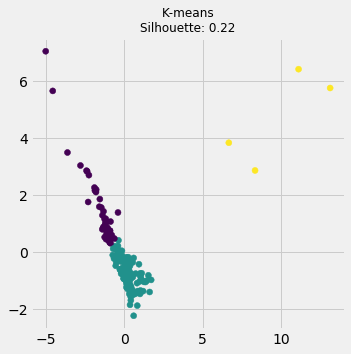

In [216]:
# The k-means plot
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(df[:, 0], df[:, 1], c=kmeans.labels_)
plt.title(f"K-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

## 2. Mean Shift

In [141]:
mshift = MeanShift()
mshift.fit(scaled_features)

MeanShift()

Text(0.5, 1.0, 'K-means\nSilhouette: 0.22')

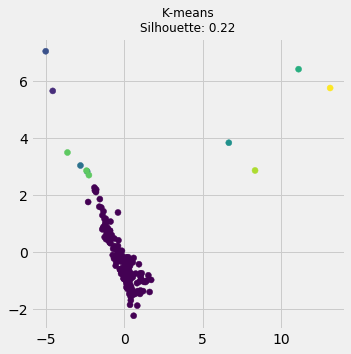

In [217]:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(df[:, 0], df[:, 1], c=mshift.labels_)
plt.title(f"K-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

## 3. DBSCAN

In [250]:
dbscan = DBSCAN(min_samples=2, eps=4)
dbscan.fit(scaled_features)

DBSCAN(eps=4, min_samples=2)

Text(0.5, 1.0, 'K-means\nSilhouette: 0.22')

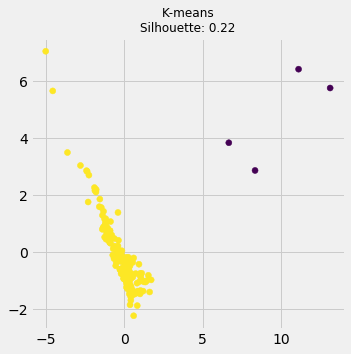

In [256]:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(df[:, 0], df[:, 1], c=dbscan.labels_)
plt.title(f"K-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

## 4. EM using GMM

In [257]:
em_gmm = GaussianMixture(n_components=3)
em_gmm_labels=em_gmm.fit_predict(scaled_features)

Text(0.5, 1.0, 'K-means\nSilhouette: 0.22')

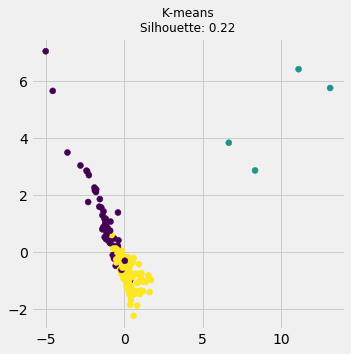

In [258]:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(df[:, 0], df[:, 1], c=em_gmm_labels)
plt.title(f"K-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

## 5. Hierarchical Clustering

In [259]:
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(scaled_features)

AgglomerativeClustering(n_clusters=3)

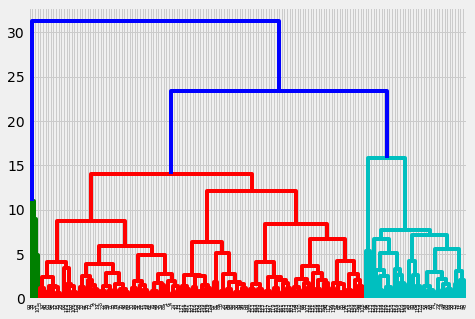

In [148]:
plt.figure(figsize=(7,5))
dend = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.show()

Text(0.5, 1.0, 'K-means\nSilhouette: 0.22')

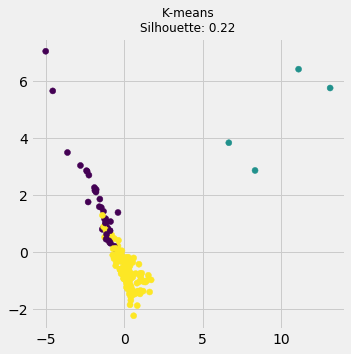

In [260]:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(df[:, 0], df[:, 1], c=agglomerative.labels_)
plt.title(f"K-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

## Compare clustering methods using the silhouette

In [261]:
# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
mshift_silhouette = silhouette_score(scaled_features, mshift.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round(2)
em_gmm_silhouette = silhouette_score(scaled_features, em_gmm_labels).round(2)
agglomerative_silhouette = silhouette_score(scaled_features, agglomerative.labels_).round(2)

In [265]:
kmeans_silhouette

0.29

In [266]:
mshift_silhouette

0.39

In [267]:
dbscan_silhouette

0.72

In [268]:
em_gmm_silhouette

0.24

In [269]:
agglomerative_silhouette

0.31

## The Overal Results

Text(0.5, 1.0, 'Agglomerative clustering\nSilhouette: 0.31')

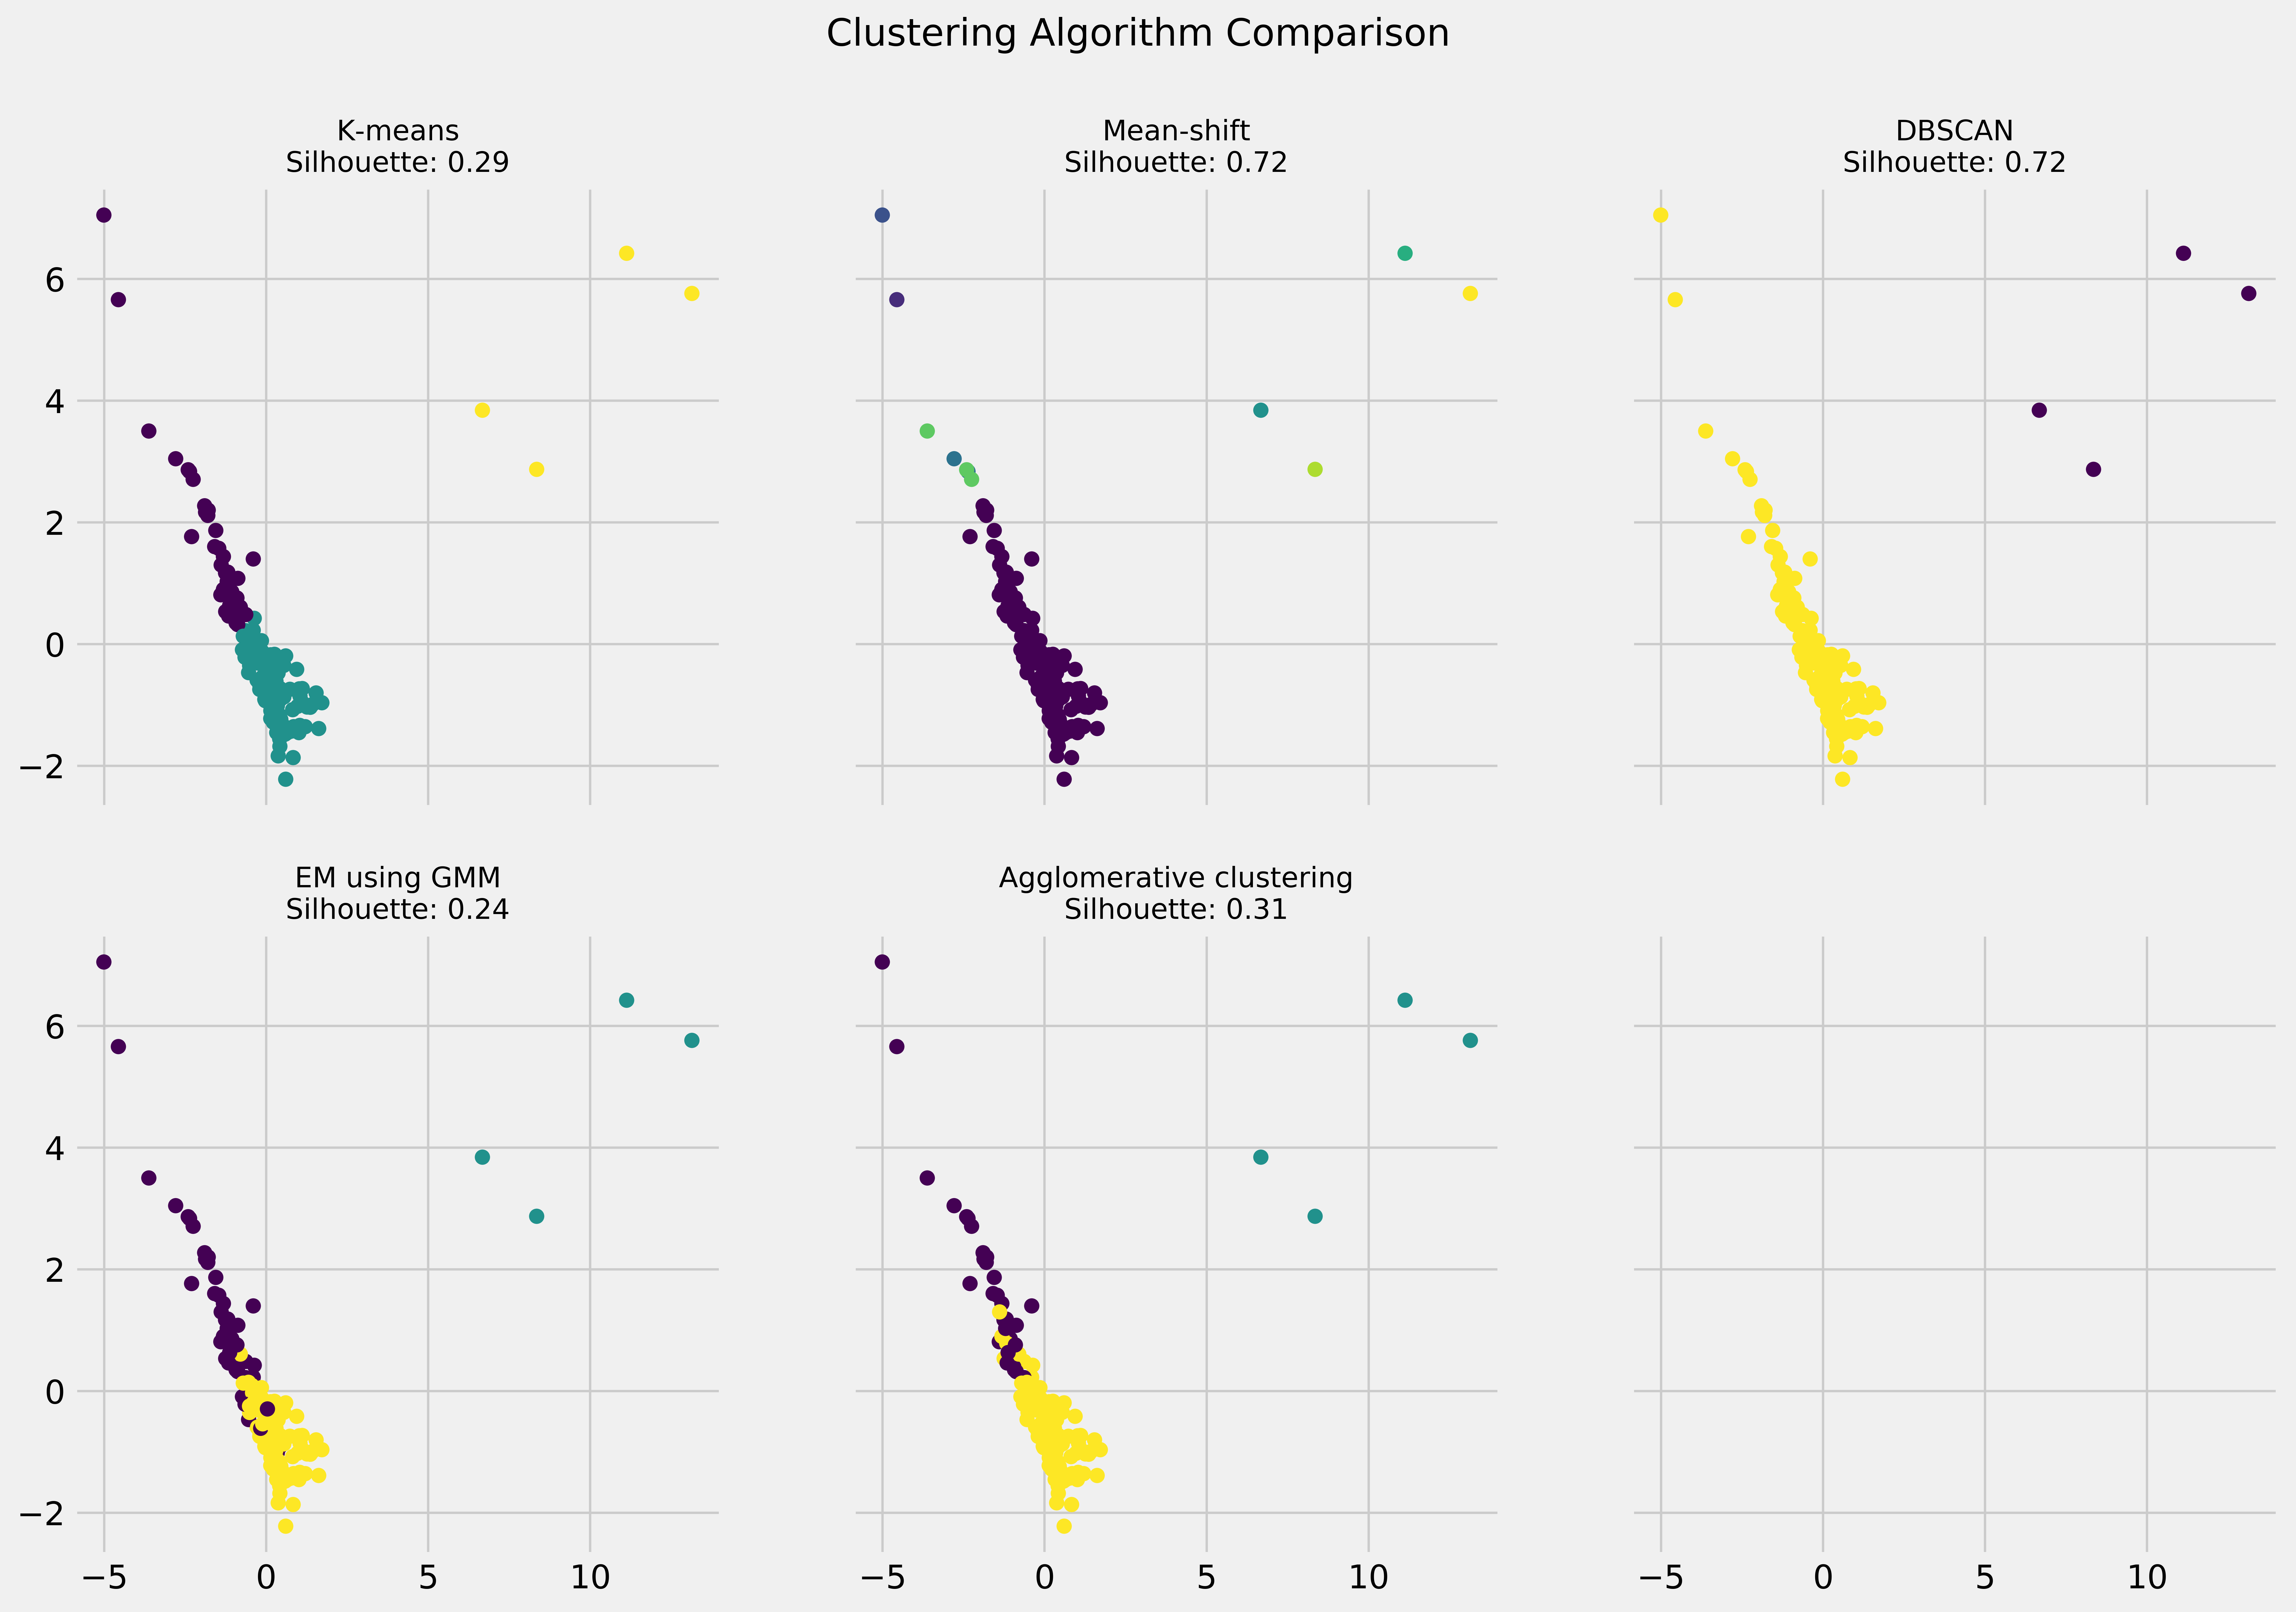

In [274]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True, dpi=600)
fig.suptitle(f"Clustering Algorithm Comparison", fontsize=16)
#fte_colors = {0: "#008fd5", 1: "#fc4f30", 2: "#1f77b4", 3: "#ff7f0e",4: "#2ca02c",5: "#d62728", -1: "#9467bd"}


# The k-means plot
ax[0,0].scatter(df[:, 0], df[:, 1], c=kmeans.labels_)
ax[0,0].set_title(f"K-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

# The mean-shift plot
ax[0,1].scatter(df[:, 0], df[:, 1], c=mshift.labels_)
ax[0,1].set_title(f"Mean-shift\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})

# The dbscan plot
ax[0,2].scatter(df[:, 0], df[:, 1], c=dbscan.labels_)
ax[0,2].set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})

# The EM using GMM
ax[1,0].scatter(df[:, 0], df[:, 1], c=em_gmm_labels)
ax[1,0].set_title(f"EM using GMM\nSilhouette: {em_gmm_silhouette}", fontdict={"fontsize": 12})

# The agglomerative plot
ax[1,1].scatter(df[:, 0], df[:, 1], c=agglomerative.labels_)
ax[1,1].set_title(f"Agglomerative clustering\nSilhouette: {agglomerative_silhouette}", fontdict={"fontsize": 12})


# plt.show()

# Part 3. GARCH models

Write a code to simulate time series according to GARCH model with non-zero parameters mu, alpha, beta. 
You may choose mu, alpha, beta yourself. Take N=2000. Plot the time series.

In [289]:
from scipy.stats import norm
import random
import math

In [290]:
n = 2000 #
random.seed(55)
e = norm.rvs(size=n)
eps = e.copy() # ARCH
r = e.copy() # AR + ARCH
sig2 = e.copy()**2 # conditional variance
sig = e.copy()
# parameters for ARCH
omega = 1
alpha = 0.5
beta = 0.4
#parameters for AR
phi = 0.9
mu = 2.5

In [291]:
for t in range(1,(n-1)):
    eps[t] = math.sqrt(sig2[t])*e[t] 
    r[t] = mu + eps[t] + phi*(r[t-1]-mu)  # modelling of mean
    sig2[t+1] = omega + alpha * eps[t]**2 + beta * sig[t]**2 # modelling for ARCH

Text(0.5, 1.0, '(b) ARCH part')

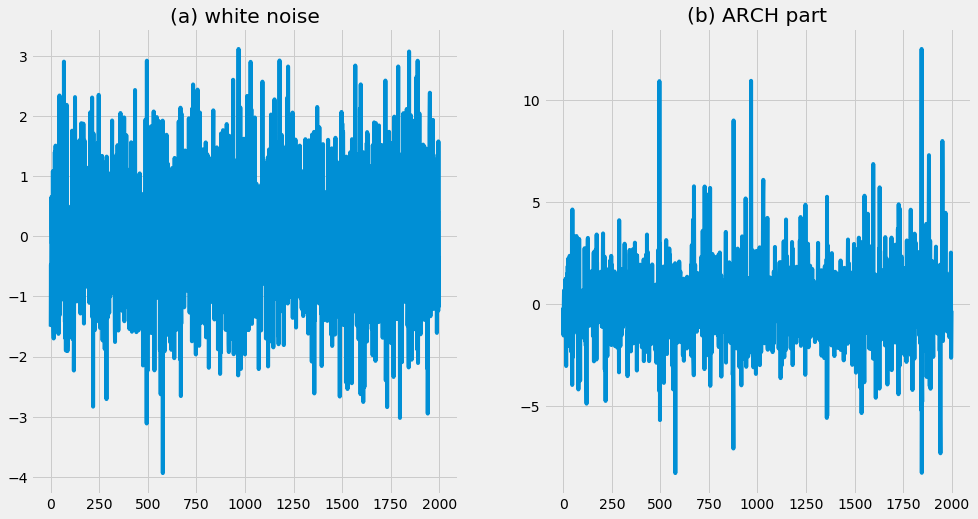

In [292]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
ax1.plot(e)
ax1.set_title("(a) white noise")
ax2.plot(eps)
ax2.set_title("(b) ARCH part")

Text(0.5, 1.0, '(b) conditional variance')

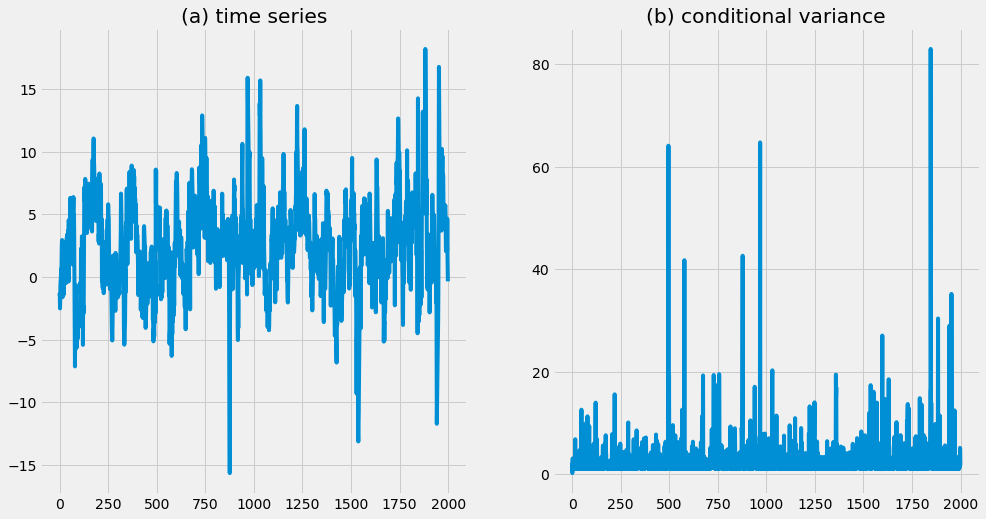

In [293]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
ax1.plot(r)
ax1.set_title("(a) time series")
ax2.plot(sig2)
ax2.set_title("(b) conditional variance")

In [294]:
s = e.copy()
for t in range(1,n):
    s[t] = r[t] + s[t-1]

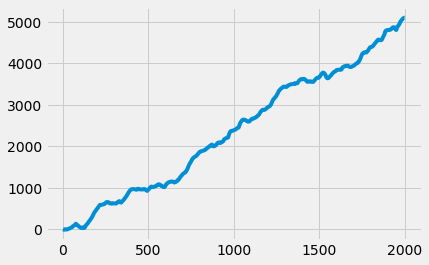

In [295]:
x_axis = range(0,n)
plt.plot(x_axis, s)
plt.show()

In [319]:
from arch import arch_model

In [320]:
garch_model = arch_model(r, p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'normal')

In [321]:
garch_result = garch_model.fit()
print(garch_result.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5048.03339489899
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5046.515380974381
Iteration:      3,   Func. Count:     23,   Neg. LLF: 5026.054159233823
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4958.739538225118
Iteration:      5,   Func. Count:     37,   Neg. LLF: 4913.523725127595
Iteration:      6,   Func. Count:     44,   Neg. LLF: 4898.040633819664
Iteration:      7,   Func. Count:     51,   Neg. LLF: 4890.655851673254
Iteration:      8,   Func. Count:     57,   Neg. LLF: 4887.871052549743
Iteration:      9,   Func. Count:     63,   Neg. LLF: 4886.378673022402
Iteration:     10,   Func. Count:     69,   Neg. LLF: 4885.429385986763
Iteration:     11,   Func. Count:     75,   Neg. LLF: 4885.142710630912
Iteration:     12,   Func. Count:     81,   Neg. LLF: 4885.11846232348
Iteration:     13,   Func. Count:     87,   Neg. LLF: 4885.117664718793
Iteration:     14,   Func. Count:     93,   Neg. LLF: 4885.1176238

In [322]:
egarch_model = arch_model(r, p = 1, q = 1, mean = 'constant', vol = 'EGARCH', dist = 'normal')

In [323]:
egarch_result = egarch_model.fit()
print(egarch_result.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5170.200492676253
Iteration:      2,   Func. Count:     15,   Neg. LLF: 4935.176411243108
Iteration:      3,   Func. Count:     23,   Neg. LLF: 4917.378201208809
Iteration:      4,   Func. Count:     32,   Neg. LLF: 4915.047243115658
Iteration:      5,   Func. Count:     39,   Neg. LLF: 4895.794314679405
Iteration:      6,   Func. Count:     45,   Neg. LLF: 4885.4212182366755
Iteration:      7,   Func. Count:     52,   Neg. LLF: 4880.172471920678
Iteration:      8,   Func. Count:     58,   Neg. LLF: 4880.086416705446
Iteration:      9,   Func. Count:     64,   Neg. LLF: 4880.057449032833
Iteration:     10,   Func. Count:     70,   Neg. LLF: 4880.0218014595
Iteration:     11,   Func. Count:     76,   Neg. LLF: 4880.018337111378
Iteration:     12,   Func. Count:     82,   Neg. LLF: 4880.018155170203
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4880.018154630967
            Iterations: 12
 

In [324]:
arch_model_obj = arch_model(r, p = 1, q = 1, mean = 'constant', vol = 'ARCH', dist = 'normal')

In [325]:
arch_result = arch_model_obj.fit()
print(arch_result.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 4931.424454480518
Iteration:      2,   Func. Count:     12,   Neg. LLF: 4929.937437506866
Iteration:      3,   Func. Count:     19,   Neg. LLF: 4929.913769273101
Iteration:      4,   Func. Count:     26,   Neg. LLF: 4929.909866467376
Iteration:      5,   Func. Count:     31,   Neg. LLF: 4929.898856771715
Iteration:      6,   Func. Count:     36,   Neg. LLF: 4929.898547101044
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4929.898547101043
            Iterations: 6
            Function evaluations: 36
            Gradient evaluations: 6
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                       ARCH   Log-Likelihood:               -4929.90
Distribution:                  Normal   AIC:

aic bic analysis

EGARCH is best

Another way is to use EGARCH (exponential GARCH) by Nelson & Cao:

GARCH(p,q): 𝜎2 = 𝜔 + σ𝑝 𝛼 𝜀2 + σ 𝛽 𝜎2 (here the variance depends not 𝑡 𝑖=1 𝑖 𝑡−𝑖 𝑖=1𝑞 𝑖 𝑡−𝑖
only on previous squared prediction error, but also on the previous variance prediction)

Visual check: compare the initial return data and the standardized residuals – 
they should be like white noise and do not have clear clustering